# ***ST1 Assignment 9 Capstone Programming Project***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab_Notebooks/ST1/u3258411_Capstone_Project_V2

/content/drive/MyDrive/Colab_Notebooks/ST1/u3258411_Capstone_Project_V2


In [3]:
!ls

DataForML.pkl	     index.html		    u3258411_Capstone_Project_V2.ipynb
Final_XGB_Model.pkl  Medical_insurance.csv


This Project is based on medical insurance data that takes into account 6 factors that impact medical expenses, these being:

*   Age
*   Sex
*   BMI (Body Mass Index)
*   Smoking status
*   Number of children
*   Region

This project will attempt to identify the target variable of 'charges' and how the above variables impact this. To solve this problem, I will develop a progressional program to perform data analysis and create a prediction model using available Python packages, modules and classes, to predict the charges of medical insurance.

This data has been obtained from:
https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction

# Step 1: Reading the dataset
This is used to import all required data into the program, ultimately giving us access to all that is required to complete the prediction.

In [4]:
#Suppressing possible warning message
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the dataset
import pandas as pd
import numpy as np
InsuranceData = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ST1/u3258411_Capstone_Project_V2/Medical_insurance.csv', encoding='latin')
print('Shape before deleting duplicate values: ', InsuranceData.shape)

#Remove all duplicates
InsuranceData = InsuranceData.drop_duplicates()
print('Shape after deleting duplicate values: ', InsuranceData.shape)

#Printing sample data to proove successful reading of dataset
InsuranceData.head(10)


Shape before deleting duplicate values:  (2772, 7)
Shape after deleting duplicate values:  (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**Key observations from Step 1**
*   Before the deletion of duplicate values, there was 2772 medical insurance cases
*   After duplication deletion, this has been reduced to 1337 medical insurance cases.
*   Age: the age in years of the person purchasing insurance.
*   Sex: the biological sex of the person purchasing insurance.
*   BMI: Body mass index. A value used to determine the body mass of an individual.
*   Children: how many children does the person purchasing insurance have.
*   Smoker: whether the person purchasing insurance regularly uses tobacco products.
*   Region: where the person purchasing insurance resides.
*   Charges: how much the person purchasing insurance gets charges for the service.



# Step 2: Problem Statement Definition
*   Creating a prediction model to predict the charges that a person purchasing insurance will adhere to.
*   Target Variable: Charges
*   Predictors/Features: Age, sex, BMI, children, smoker, region.

# Step 3: Choosing the appropriate Machine Learning / Artificial Intelligence Algorithm for Data Analysis

* As per the identified problem, it is concluded that a supervised machine learning model need to be created, as the target variable is continuous.

# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed).
*   If the target variable distribution is too skewed, the predictive modelling will lead to inaccurate results.
*   Therefore, a Bell curve is ideal, however, there is room for inconsistencies, meaning that a slight positive or negative skew is also acceptable. If it is anything more than a slight skew, this will impact the machine learning algorithms ability to predict all scenarios.

<Axes: >

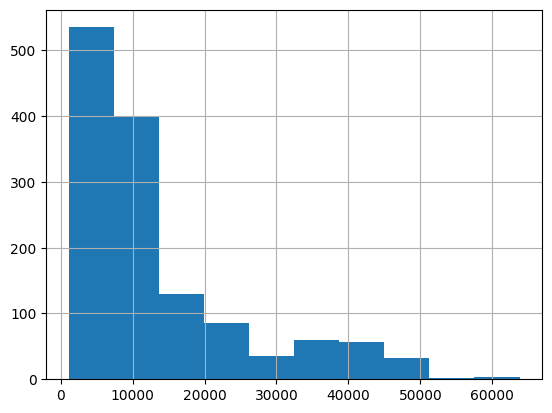

In [6]:
#Creation of a histogram around the Target variable will assist in indicating the distribution of the dataset.
%matplotlib inline
InsuranceData['charges'].hist()

**Observations from Step 4**
*   The data distribution of the target variable is unsatisfactory to proceed further
*   As there is not enough values from upper bound data, meaning we need to eliminate outliers.

In [7]:
#Determining the quantiles required to determine the upperbound and lower bound.
Q1 = InsuranceData['charges'].quantile(0.25)
print('Q1: ', Q1)
Q3 = InsuranceData['charges'].quantile(0.75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)

Q1:  4746.344
Q3:  16657.71745
IQR:  11911.37345


In [8]:
#Creating a new variable to exclude outliers
InsuranceData_Without_Outliers = InsuranceData[~((InsuranceData['charges'] < (Q1 - 1.5 * IQR)) |(InsuranceData['charges'] > (Q3 + 1.5 * IQR)))]

In [9]:
#Assigning the old 'InsuranceData' variable to be equal to the new variable 'InsuranceData_without_outliers'
InsuranceData = InsuranceData_Without_Outliers
InsuranceData.shape

(1198, 7)

<Axes: >

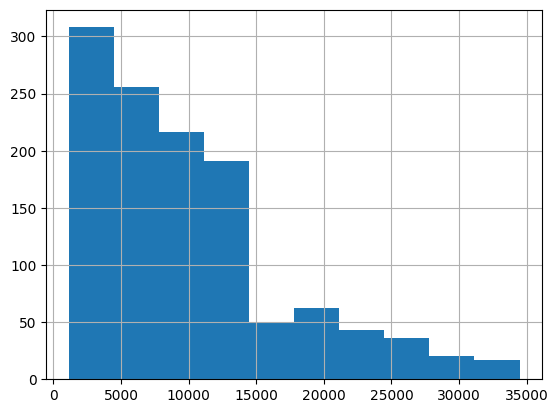

In [10]:
# Producing a new histogram to present the new data set.
InsuranceData['charges'].hist()

After eliminating outliers, there is now substanial data to conduct data analysis.

# Step 5: Basic Exploratory Data Analysis
*   There are four commands used for basic data exploratory analysis in python, they are as listed:
1.  head() / tail(): Presents a few sample rows of data.
2.  info(): Presents summarised information of data.
3.  describe(): Presents descriptive details on statistical data.
4.  nunique(): Assist in identifying a column as categorical or continuous

In [11]:
# Sample rows from start of data
InsuranceData.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Sample rows from end of data
InsuranceData.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [13]:
# Summarised information of data
# Details that there are no missing values, meaning that no rows need to be eliminated
InsuranceData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1198 non-null   int64  
 1   sex       1198 non-null   object 
 2   bmi       1198 non-null   float64
 3   children  1198 non-null   int64  
 4   smoker    1198 non-null   object 
 5   region    1198 non-null   object 
 6   charges   1198 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.9+ KB


In [14]:
# Descriptive Statistics
InsuranceData.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1198.000000,1198,1198.000000,1198.000000,1198,1198,1198.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,612,NaN,NaN,1060,307,NaN
mean,39.006678,NaN,30.094787,1.085142,NaN,NaN,9934.671758
std,14.062040,NaN,6.013044,1.214407,NaN,NaN,7240.216987
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,25.800000,0.000000,NaN,NaN,4418.591062
50%,39.000000,NaN,29.735000,1.000000,NaN,NaN,8411.754950
75%,51.000000,NaN,33.820000,2.000000,NaN,NaN,12955.356300


In [15]:
# To understand which columns are categorical and continuous, we find how many unique values there are for each column.
# Typically categorical variables have less than 20 unique variables.
InsuranceData.nunique()

age           47
sex            2
bmi          518
children       6
smoker         2
region         4
charges     1198
dtype: int64

**Observations from Step 5 - Basic Exploratory Data Analysis**

Disclaimer: The selected columns in this step are not finalised as further study will help disipher final list decisions.

Age: Continuous, Selected

Sex: Categorical, Selected

BMI: Continuous, Selected

Children: Categorical, Selected

Smoker: Categorical, Selected

Region: Categorical, Selected

Charges: Continuous, Selected. This is the target variable (what will be predicted)

# Step 6 - Removing Unwanted Columns
*   There are no columns of data that are irrelevant, meaning that there is no need to remove any columns.
*   Disclaimer: this is subject to change throughout the report.

# Step 7: Visual Exploratory Data Analysis

Typically, categorical variables have less that 20 unique values, and based on the information gained from the 'Basic Exploration Data Analysis' section, I can concluded that the categorical predictors for this dataset are as followed:
*   sex
*   smoker
*   children
*   region

In [16]:
# defining a function to plot bar charts for multiple columns
def PlotBarCharts (inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt

  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: ' + str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

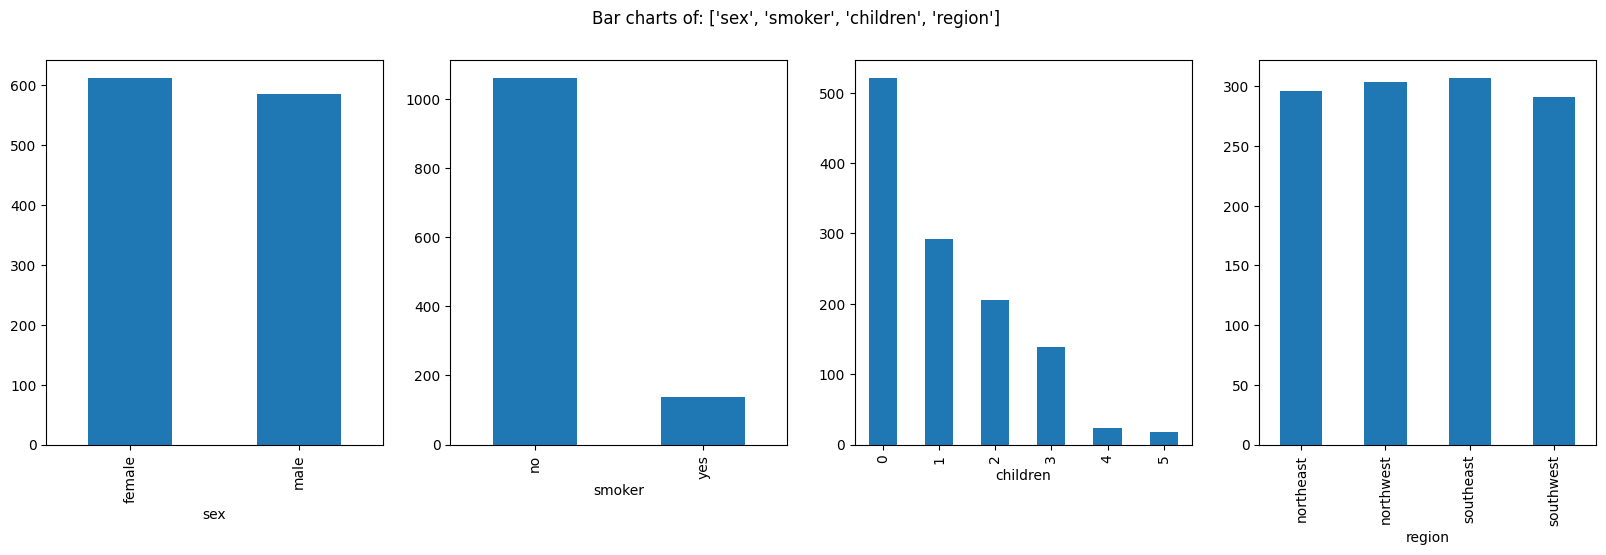

In [17]:
# Calling the above function to plot the bar charts for 'sex', 'smoker', 'children', and 'region'
PlotBarCharts(inpData=InsuranceData, colsToPlot=['sex', 'smoker', 'children', 'region'])

**Observations from Step 7 - Visual Exploratory Data Analysis**

These bar charts have enabled the interpretation of four of the data columns. They have represented the frequencies of each of the four categories through the y-axis.

*   In this dataset, it is notable that 'smoker' and 'children' is skewed, concluding that such columns may not be correlated with the target variable of 'charges'.
*   However, all categorical variables are selected for further analysis.

# Step 8: Visualising the distribution of all the continuous predictor variables in the data using histograms

Based on the Basic Exploratory Data Analysis, the continuous predictor variables are as followed:

*   Age
*   BMI

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

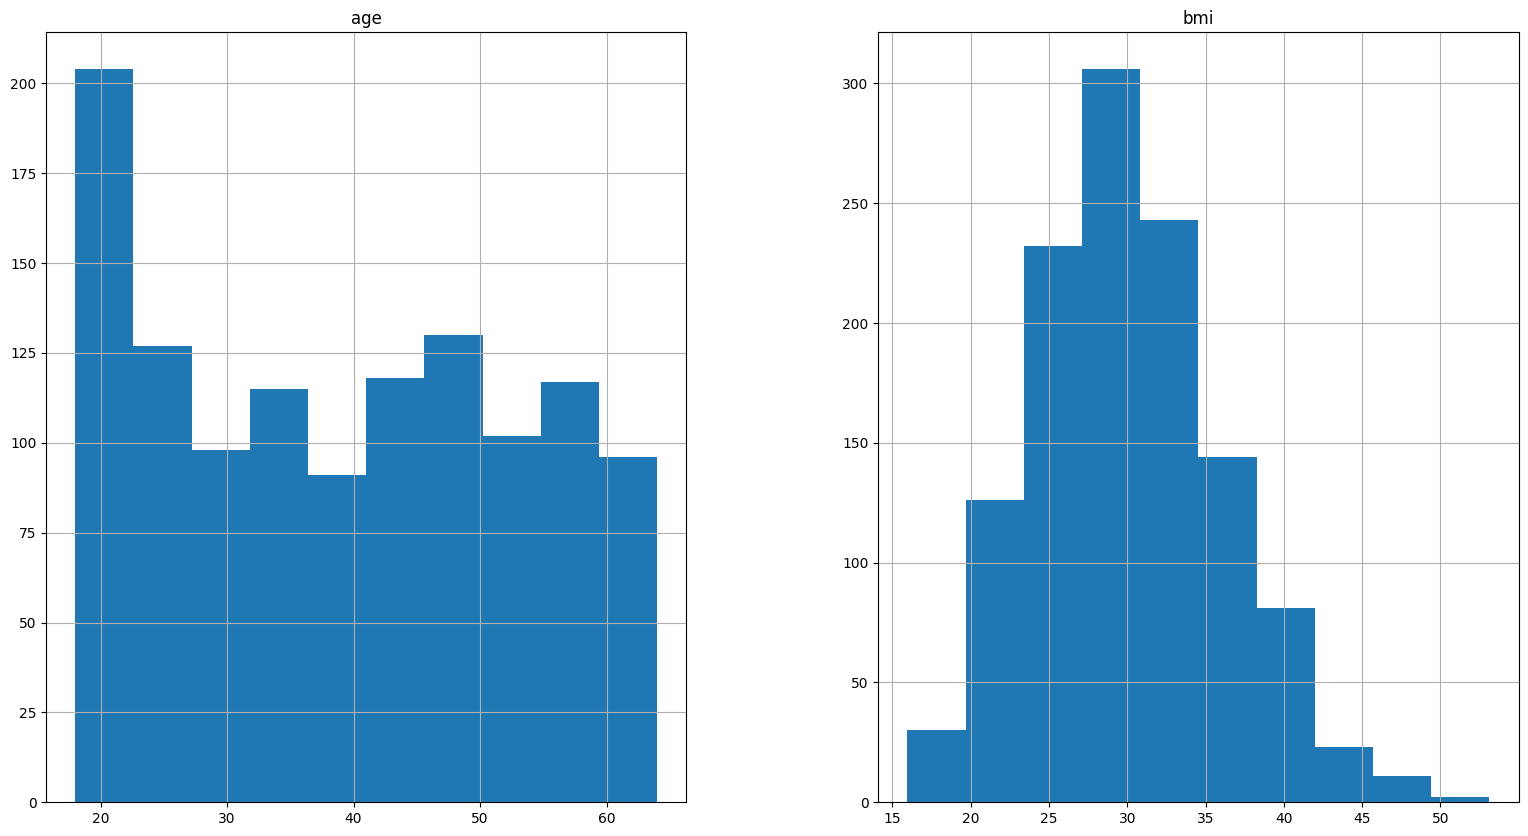

In [18]:
# Plotting histograms of multiple columns together
InsuranceData.hist(['age', 'bmi'], figsize = (19,10))

**Observations from Step 8**
*   Ideally the outcome for these histograms would be a bell curve, which is acceptable with a slight skew. If the histogram is too skewed, outlier removal will be required.

Selected Continuous Variables:
*   age: Selected. The distribution is good.
*   bmi: Selected. The distribution is good.

# Step 9: Outlier Analysis

I determined as 'BMI' is already in a bell curve, it does not need to have outliers redefined. However 'age' does.

<Axes: xlabel='age'>

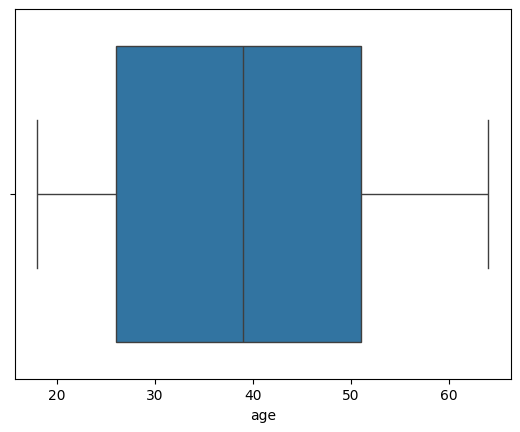

In [19]:
# Creation of a Box Plot
import seaborn as sns
sns.boxplot(x=InsuranceData['age'])

In [20]:
# Determining the exact quantiles
Q1 = InsuranceData['age'].quantile(0.25)
print('Q1: ', Q1)
Q3 = InsuranceData['age'].quantile(0.75)
print('Q3: ', Q3)

Q1:  26.0
Q3:  51.0


In [21]:
# Finding nearest age to the 51 mark
InsuranceData['age'][InsuranceData['age']<51].sort_values(ascending=False)

1222    50
711     50
925     50
870     50
351     50
        ..
525     18
529     18
564     18
571     18
1212    18
Name: age, Length: 883, dtype: int64

In [22]:
# Replacing upper outliers with nearest possible value
InsuranceData['age'][InsuranceData['age']>51] =50

In [23]:
# Finding nearest age to the 26 mark
InsuranceData['age'][InsuranceData['age']>26].sort_values(ascending=False)

279     51
864     51
1020    51
1009    51
483     51
        ..
562     27
1214    27
1123    27
511     27
657     27
Name: age, Length: 891, dtype: int64

In [24]:
# Replacing lower outliers with nearest possible value
InsuranceData['age'][InsuranceData['age']<26] =27

All outliers for continuous data has now been redefined.

# Step 10: Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'age'}>]], dtype=object)

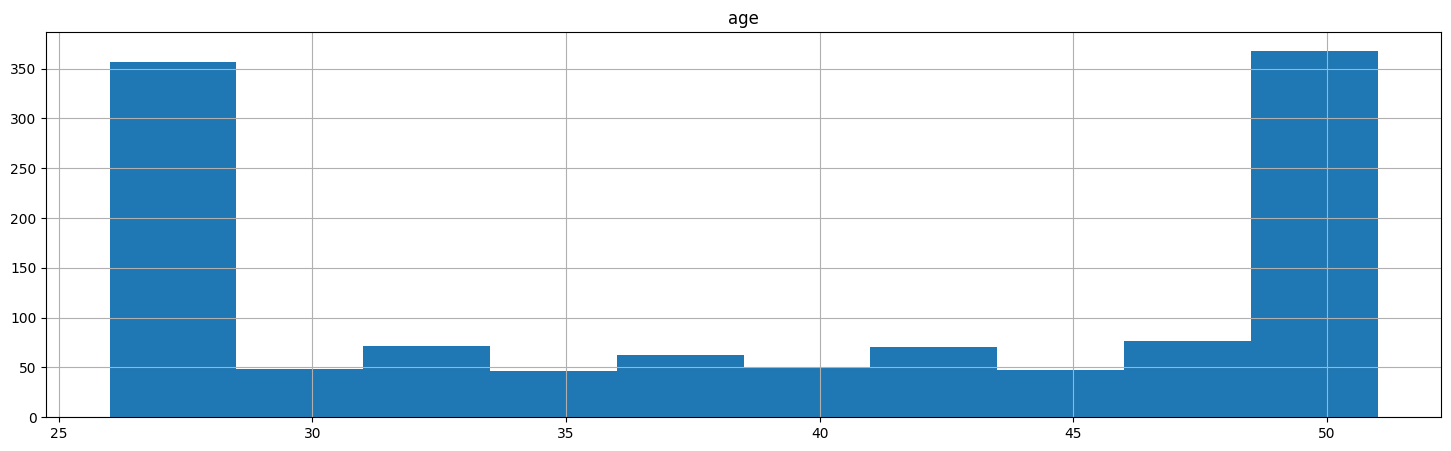

In [25]:
InsuranceData.hist(['age'], figsize= (18,5))

**Observation from Step 11**
*   The distribution has improved after ammending outliers.
*   The age distribution is now less skewed, making it more acceptable.
*   There are many values in both the higher age groups and lower age groups, hence making an acceptable data set.

# Step 11: Missing Values Analysis

In [26]:
InsuranceData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Step 11 Observations**

As there are no missing values in the data, that means that no values need to be removed.

# Step 12: Feature Selection (Attribute Selection)


**Visual Exploration of Relationship between variables**
*   Continuous vs. Continuous - Scatter Plot
*   Categorical vs. Continuous - Box Plot
*   Categorical vs. Categorical - Grouped Var Plot

**Statistical Measurement of relationship strength between variables**
*   Continuous vs. Continuous - Correlation matrix
*   Categorical vs. Continuous - ANOVA test
*   Categorical vs. Categorical - Chi-Square test.

**For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**
*   Continuous Target Variable vs. Continuous Predictor
*   Continuous Target Variable vs. Categorical Predictor.

**Continuous vs. Continuous - Scatter Charts**

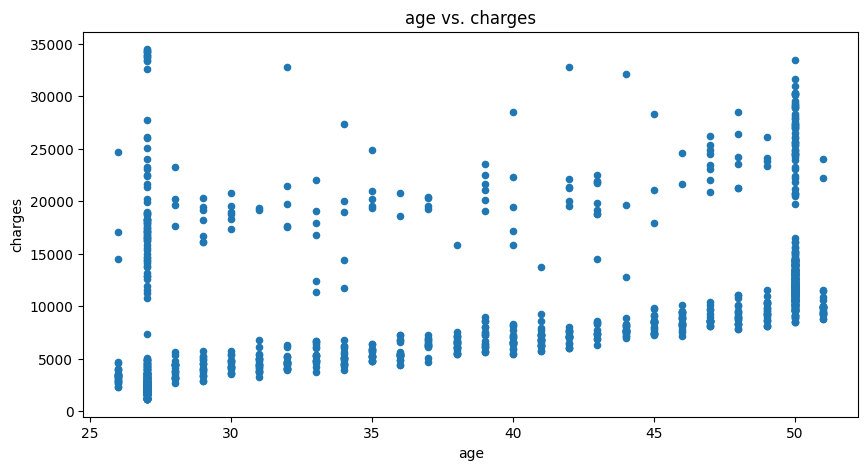

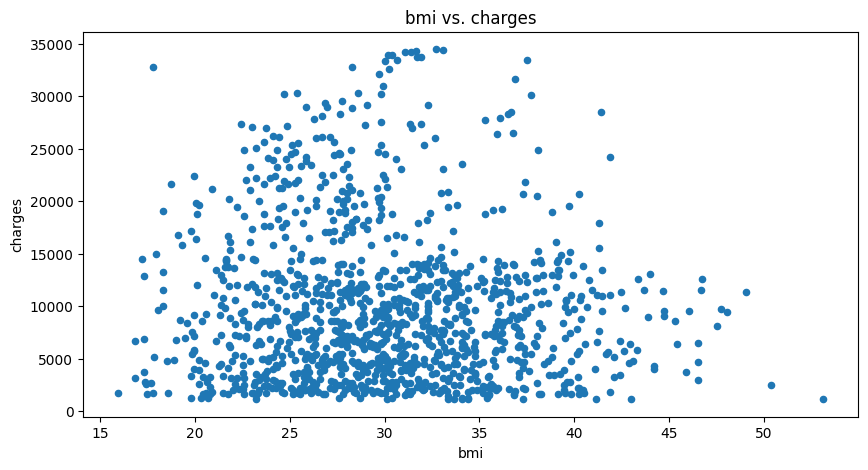

In [27]:
ContinuousCols = ['age', 'bmi']
# Plotting scatter chart for each continuous predictor vs. charges
for predictor in ContinuousCols:
  InsuranceData.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+' vs. '+ 'charges')

**Scatter charts intepretation**

age vs. charges

*There is an increasing trend. Typically, the higher the age, the higher the charges.*

bmi vs. charges

*There is no obvious trend. However, there is evidence that for lower and higher bmi, charges increase.*

# Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation Value

Pearson's correlation coefficient can be used to calculate the covarience between two features.

In [28]:
ContinuousCols = ['age', 'bmi', 'charges']
# Creating the correlation matrix
CorrelationData=InsuranceData[ContinuousCols].corr()
CorrelationData

,age,bmi,charges
age,1.000000,0.118052,0.422062
bmi,0.118052,1.000000,-0.066453
charges,0.422062,-0.066453,1.000000


In [29]:
# Filter those columns with a correlation that is >0.25
CorrelationData['charges'][abs(CorrelationData['charges'])>0.25]

age        0.422062
charges    1.000000
Name: charges, dtype: float64

**Observations from Step 13**
*   There was a correlation between age and charges.
*   Final selected Continuous columns: 'age'

# Step 14: Relationship exploration: Categorical vs. Continuous - Box Plots

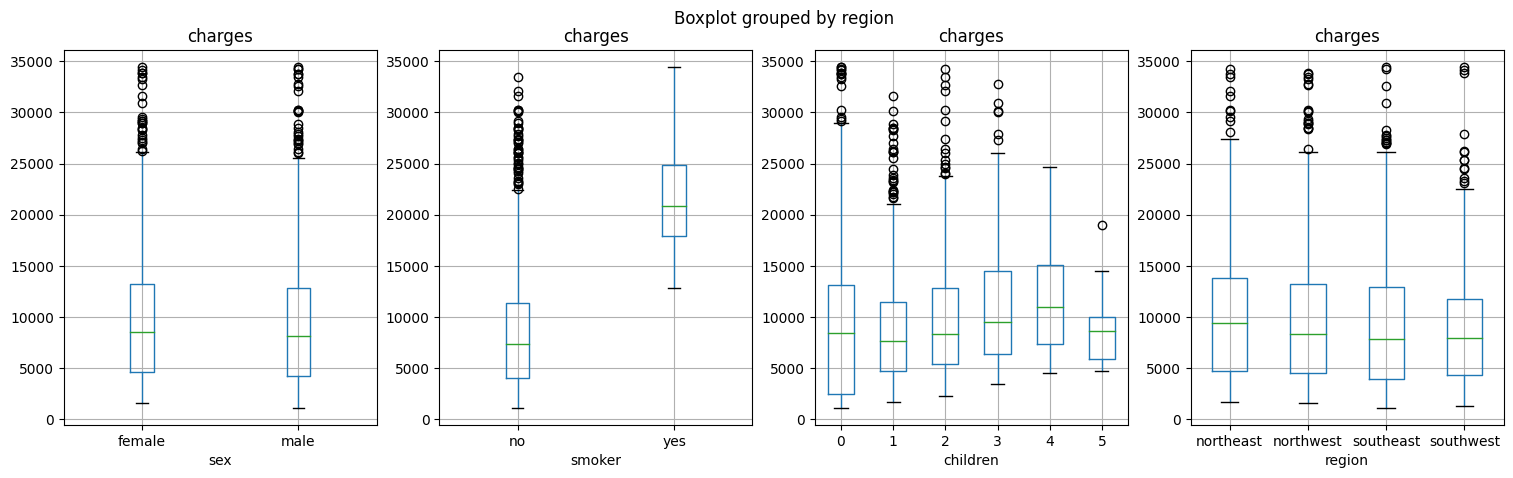

In [30]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['sex', 'smoker', 'children', 'region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "charges"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    InsuranceData.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

**Observations from Step 14:**
*   As there is little difference between 'sex' box plots, this means that they have no effect on the charges.
*   As there is difference between 'smoker' box plots this means that they have effect on the charges.
*   As there is difference between the 'children' box plots, this means that they have effect on the charges.
*   As there is difference between the 'region' box plots, this means that they have effect on the charges.

# Step 15: Statistical Feature Selection (Categorical vs. Continuous) using ANOVA test

The above conclusion has been confirmed by the following use of the ANOVA test:

In [31]:
# Defining the function to conduct the ANOVA test
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)


In [32]:
CategoricalPredictorList=['sex', 'smoker', 'children', 'region']
FunctionAnova(inpData=InsuranceData,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

sex is NOT correlated with charges | P-Value: 0.4182975338416681
smoker is correlated with charges | P-Value: 3.8387968420872617e-119
children is correlated with charges | P-Value: 0.01634892196581675
region is correlated with charges | P-Value: 0.016515235873468183


['smoker', 'children', 'region']

**Observations from Step 15**
*   The results from the ANOVA test confirm the visual observations from Step 14.
*   Therefore, 'smoker', 'children', and 'region' all have a correlation with the 'charges'.

**Selecting final Predictors/Features for building Machine Learning/AI model.**

Based on the data analytical test's above, it can be concluded that the following columns should be used for building the machine learning model:
*   Age
*   Smoker
*   Children
*   Region

In [33]:
# Selection of the finals are shown below.
SelectedColumns=['age', 'smoker', 'children', 'region']
DataForML=InsuranceData[SelectedColumns]
DataForML.head(10)

,age,smoker,children,region
0,27,yes,0,southwest
1,27,no,1,southeast
2,28,no,3,southeast
3,33,no,0,northwest
4,32,no,0,northwest
5,31,no,0,southeast
6,46,no,1,southeast
7,37,no,3,northwest
8,37,no,2,northeast
9,50,no,0,northwest


In [34]:
# Saving the final subset of data.
DataForML.to_pickle('DataForML.pkl')

# Step 16: Data Pre-processing for Machine Learning Model Building or Model Development

**Converting the nominal variable to numeric using get_dummies()**

In [35]:
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric['charges']=InsuranceData['charges']
DataForML_Numeric.head(10)

,age,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,27,0,False,True,False,False,False,True,16884.92400
1,27,1,True,False,False,False,True,False,1725.55230
2,28,3,True,False,False,False,True,False,4449.46200
3,33,0,True,False,False,True,False,False,21984.47061
4,32,0,True,False,False,True,False,False,3866.85520
5,31,0,True,False,False,False,True,False,3756.62160
6,46,1,True,False,False,False,True,False,8240.58960
7,37,3,True,False,False,True,False,False,7281.50560
8,37,2,True,False,True,False,False,False,6406.41070
9,50,0,True,False,False,True,False,False,28923.13692


# Step 17: Machine Learning Model Development:
This step aims to convert variables before machine learning utilises the data.

In [36]:
DataForML_Numeric.columns

Index(['age', 'children', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

In [37]:
TargetVariable = 'charges'
Predictors= ['age', 'smoker_yes', 'children', 'region_northeast','region_northwest', 'region_southeast', 'region_southwest']

x = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=428)

# Step 18: Standardisation/Normalisation of data

In [38]:
# The conduction of standardisation for the data.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# MinMax normalisation
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardised value of x
X=PredictorScalerFit.transform(x)

#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(838, 7)
(838,)
(360, 7)
(360,)


# Step 19: Multiple Linear Regression Algorithm For ML/AI model building

In [40]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing the parameters
print(RegModel)

# Creating the model of Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring the Goodness of fit in Training data
print('R2 Value: ',metrics.r2_score(y_train, LREG.predict(X_train)))
print('\n##### Model Validation and Accuracy Calculations #####')

# Print some of the sample values of the prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head(10))

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig-pred) / orig))
  return(100 - MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_scorer = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_scorer)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


LinearRegression()
R2 Value:  0.5835363330340075

##### Model Validation and Accuracy Calculations #####
  age smoker_yes children region_northeast region_northwest region_southeast  \
0  27      False        1             True            False            False   
1  28      False        0            False             True            False   
2  29       True        1            False            False             True   
3  27      False        0             True            False            False   
4  28       True        3            False            False             True   
5  36      False        0            False             True            False   
6  42      False        2            False             True            False   
7  27      False        0            False             True            False   
8  50      False        2             True            False            False   
9  27      False        1            False             True            False   

  region_south

**Decision Tree Regressor**

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.6514703468265153

##### Model Validation and Accuracy Calculations ##########
  age smoker_yes children region_northeast region_northwest region_southeast  \
0  27      False        1             True            False            False   
1  28      False        0            False             True            False   
2  29       True        1            False            False             True   
3  27      False        0             True            False            False   
4  28       True        3            False            False             True   

  region_southwest      charges  Predictedcharges  
0            False  11272.33139            7981.0  
1            False  19673.33573            3042.0  
2            False  19107.77960           24051.0  
3            False   2196.47320            3042.0  
4            False  17663.14420           24051.0  
Mean Accuracy on test data: 68.2021378915042
Median Accu

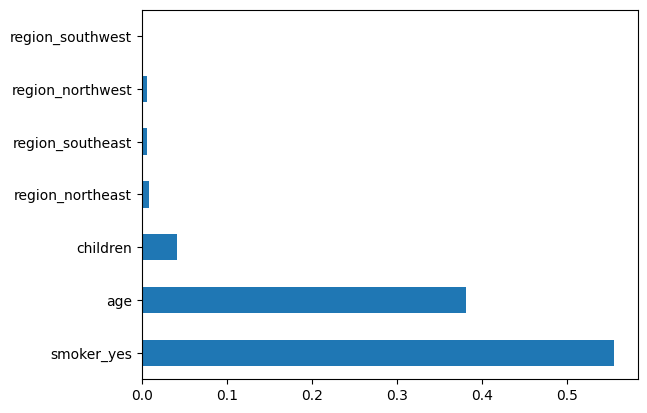

In [41]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Plotting/Visualising the Decision Tree**

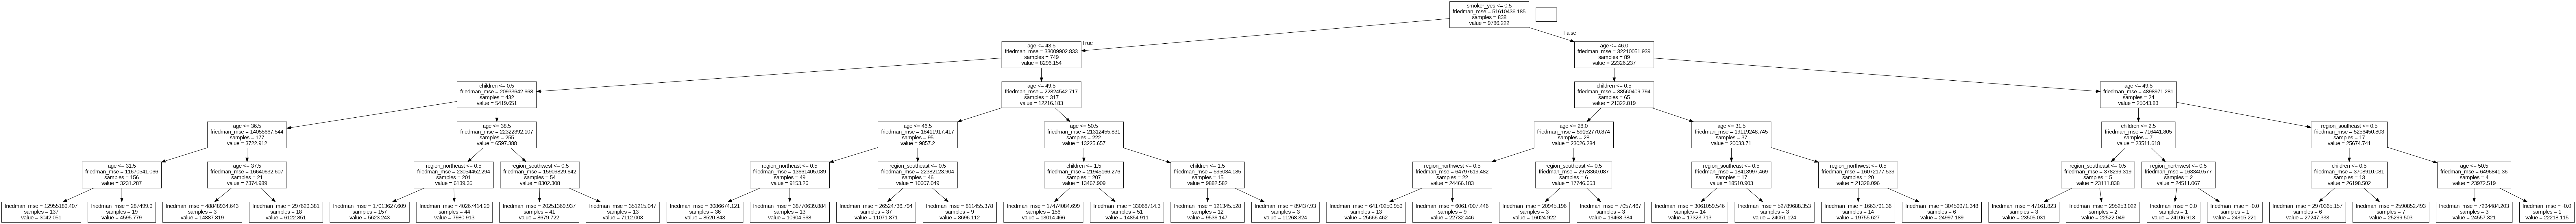

In [42]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)

# Step 20: K-Nearest Neighbour (KNN) Algorithm for ML/AI model building

In [43]:
# K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model of Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring Goodness of fit in Training Data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculatin
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.593878750115518

##### Model Validation and Accuracy Calculations ##########
  age smoker_yes children region_northeast region_northwest region_southeast  \
0  27      False        1             True            False            False   
1  28      False        0            False             True            False   
2  29       True        1            False            False             True   
3  27      False        0             True            False            False   
4  28       True        3            False            False             True   

  region_southwest      charges  Predictedcharges  
0            False  11272.33139           13003.0  
1            False  19673.33573            2973.0  
2            False  19107.77960            8980.0  
3            False   2196.47320            2626.0  
4            False  17663.14420           14558.0  
Mean Accuracy on test data: 68.71079594259697
Median Accuracy on test data: 80.5630

# Step 21: Model Deployment


In [44]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment.
Predictors=['age', 'smoker_yes', 'children']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Standardisation of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardised values of x
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1198, 3)
(1198,)


**Cross validating the final model accuracy with less predictors**

In [45]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [61.29510733 66.76988776 65.88701372 64.23248247 65.33206172 64.43785153
 66.48642478 68.82032682 69.38184364 64.12297317]

Final Average Accuracy of the model: 65.68


# Step 22: Retraining the final model using 100% data

In [46]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialised file which can be stored anywhere

In [47]:
import pickle
import os

with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Colab_Notebooks/ST1/u3258411_Capstone_Project_V2


# Step 24: Create a python function

In [48]:
from re import IGNORECASE

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'smoker_yes', 'children']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardised values of X
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()

    # Generating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [49]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[19,False,1],[30,True,2]],columns=['age', 'smoker_yes', 'children'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   age  smoker_yes  children
0   19       False         1
1   30        True         2


,Prediction
0,3128.122803
1,6576.983887


# Conclusion
*   The created function 'FunctionPredictResult()' can produce the prediction for new cases and the charges a client will have to pay.

# Deploying the model with few parameters

**Functions for predictions API**

In [50]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age , inp_smoker_yes, inp_children):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age , inp_smoker_yes, inp_children]],
     columns=['age', 'smoker_yes', 'children'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_age=19, inp_smoker_yes=False, inp_children=0)

'{"Prediction":{"0":2357.5009765625}}'

# Web Deployment using Flask Library/Package

**Installing the flask library required to create the API**

In [51]:
!pip install flask

**Creating Flask API**

In [52]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [53]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        age_value = float(request.args.get('age'))
        smoker_yes_value=bool(request.args.get('smoker_yes'))
        children_value=int(request.args.get('children_value'))

        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_age=age_value,
                                                       inp_smoker_yes=smoker_yes_value,
                                                       inp_children=children_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

**Starting the API engine**

In [ ]:
import os
if __name__ =="__main__":

    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


Sample URL
http://127.0.0.1:9000/prediction_api?age=19&smoker_yes=False&children=1

# Bibliography
G. Chetty, ST1_Week_09_Lecture. UCLearn: University of Canberra, 2024.

S. Thomas, Calculate Outlier Formula: A Step-By-Step Guide. Outlier, 2022. https://articles.outlier.org/calculate-outlier-formula

s. Verma, Outliers-checkpoint.ipymb. Google Colab, 2018. https://colab.research.google.com/github/Shivam-verma7/machine-learning/blob/master/Outliers-checkpoint.ipynb#scrollTo=FafWZ_mgnboq